In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(x_train_image,y_train_label),(x_test_image,y_test_label) = tf.keras.datasets.cifar10.load_data()
x_train_normalize = x_train_image.astype('float32')/255
x_test_normalize = x_test_image.astype('float32')/255
y_train_OneHot = tf.keras.utils.to_categorical(y_train_label)
y_test_OneHot = tf.keras.utils.to_categorical(y_test_label)

In [5]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=16,kernel_size=3,strides=1,input_shape=(32,32,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2,strides=2,padding='same'))
model.add(keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2,strides=2,padding='same'))
model.add(keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2,strides=2,padding='same'))
model.add(keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2,strides=2,padding='same'))
'''
model.add(keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2,strides=2,padding='same'))
'''
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 32)         

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_train = model.fit(x=x_train_normalize,y=y_train_OneHot,validation_split=0.2,epochs=20,batch_size=300,verbose=1)

Epoch 1/20
134/134 [==============================] - 1s 11ms/step - loss: 1.0004 - accuracy: 0.6561 - val_loss: 1.0149 - val_accuracy: 0.6421
Epoch 2/20
134/134 [==============================] - 1s 10ms/step - loss: 0.9404 - accuracy: 0.6779 - val_loss: 1.0484 - val_accuracy: 0.6376
Epoch 3/20
134/134 [==============================] - 1s 10ms/step - loss: 0.9042 - accuracy: 0.6905 - val_loss: 1.0244 - val_accuracy: 0.6488
Epoch 4/20
134/134 [==============================] - 1s 11ms/step - loss: 0.8750 - accuracy: 0.6986 - val_loss: 0.9995 - val_accuracy: 0.6612
Epoch 5/20
134/134 [==============================] - 1s 10ms/step - loss: 0.8327 - accuracy: 0.7155 - val_loss: 1.0000 - val_accuracy: 0.6588
Epoch 6/20
134/134 [==============================] - 1s 10ms/step - loss: 0.8071 - accuracy: 0.7252 - val_loss: 0.9654 - val_accuracy: 0.6687
Epoch 7/20
134/134 [==============================] - 1s 10ms/step - loss: 0.7707 - accuracy: 0.7355 - val_loss: 0.9975 - val_accuracy: 0.6649

In [8]:
def train_history(model_train,train,val):
    plt.plot(model_train.history[train])
    plt.plot(model_train.history[val])
    plt.title('Train History')
    plt.xlabel('epoch')
    plt.ylabel(train)
    plt.legend(['train','validation'],loc='upper left')

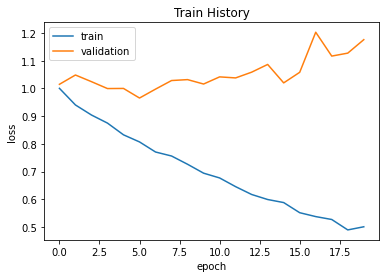

In [9]:
train_history(model_train,'loss','val_loss')

In [10]:
scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=2)

313/313 - 1s - loss: 1.2362 - accuracy: 0.6527


In [11]:
model.save('./VGGnet.h5', save_format="h5")